In [1]:
# Load corpus directory
import os
import delta
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
raw_corpus = delta.Corpus('data/corpus/', lower_case=True)
print(raw_corpus.shape)
raw_corpus.iloc[0:5,0:10]

c:\github\nettt-2022\.venv\lib\site-packages\delta\corpus.py:252: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  df = pd.DataFrame.from_dict(data, orient='index', dtype=dtype)


(1292, 12358)


,της,το,και,του,την,των,για,θα,η,να
g_001,33.0,23.0,26.0,30.0,23.0,16.0,12.0,27.0,17.0,25.0
g_002,32.0,31.0,23.0,42.0,22.0,11.0,23.0,30.0,15.0,28.0
g_003,7.0,4.0,5.0,3.0,7.0,1.0,6.0,4.0,10.0,2.0
g_004,24.0,15.0,17.0,17.0,6.0,10.0,14.0,0.0,6.0,4.0
g_005,0.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0


In [3]:
all_words = raw_corpus.get_mfw_table(0)
all_words

,της,το,και,του,την,των,για,θα,η,να,...,δημητριάδη,πανίκο,δίκτυο,ενώσεων,προσεγγίζονται,byrne,pedro,γεωργιάδη,φορολογίας,απαγόρευσης
g_001,0.035408,0.024678,0.027897,0.032189,0.024678,0.017167,0.012876,0.028970,0.018240,0.026824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_002,0.030418,0.029468,0.021863,0.039924,0.020913,0.010456,0.021863,0.028517,0.014259,0.026616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_003,0.030043,0.017167,0.021459,0.012876,0.030043,0.004292,0.025751,0.017167,0.042918,0.008584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_004,0.033520,0.020950,0.023743,0.023743,0.008380,0.013966,0.019553,0.000000,0.008380,0.005587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_005,0.000000,0.010000,0.020000,0.020000,0.020000,0.010000,0.010000,0.020000,0.020000,0.010000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h_642,0.033333,0.066667,0.000000,0.033333,0.066667,0.000000,0.033333,0.000000,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_643,0.063492,0.031746,0.000000,0.031746,0.047619,0.015873,0.015873,0.031746,0.015873,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_644,0.013793,0.041379,0.027586,0.020690,0.027586,0.006897,0.041379,0.020690,0.006897,0.013793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_645,0.000000,0.035294,0.017647,0.023529,0.023529,0.005882,0.041176,0.041176,0.017647,0.005882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Sort index by document pair
zip_corpus = raw_corpus.sort_index(
    key=lambda x: x.str.replace('(g|h)_', '', regex=True)
    .astype(int)
)
zip_corpus.iloc[:6, :10]

,της,το,και,του,την,των,για,θα,η,να
g_001,33.0,23.0,26.0,30.0,23.0,16.0,12.0,27.0,17.0,25.0
h_001,33.0,23.0,26.0,34.0,27.0,26.0,11.0,28.0,21.0,24.0
h_002,34.0,30.0,23.0,44.0,25.0,21.0,19.0,32.0,18.0,26.0
g_002,32.0,31.0,23.0,42.0,22.0,11.0,23.0,30.0,15.0,28.0
g_003,7.0,4.0,5.0,3.0,7.0,1.0,6.0,4.0,10.0,2.0
h_003,6.0,1.0,7.0,5.0,7.0,1.0,4.0,4.0,10.0,2.0


In [5]:
from sklearn.preprocessing import MinMaxScaler

x = zip_corpus.values
scl = MinMaxScaler()
x_scaled = scl.fit_transform(x)
zip_corpus = pd.DataFrame(x_scaled,
                    columns=zip_corpus.columns,
                    index=zip_corpus.index
                  )
zip_corpus.head(10)

,της,το,και,του,την,των,για,θα,η,να,...,δημητριάδη,πανίκο,δίκτυο,ενώσεων,προσεγγίζονται,byrne,pedro,γεωργιάδη,φορολογίας,απαγόρευσης
g_001,0.611111,0.442308,0.590909,0.638298,0.479167,0.355556,0.292683,0.84375,0.548387,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_001,0.611111,0.442308,0.590909,0.723404,0.562500,0.577778,0.268293,0.87500,0.677419,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_002,0.629630,0.576923,0.522727,0.936170,0.520833,0.466667,0.463415,1.00000,0.580645,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_002,0.592593,0.596154,0.522727,0.893617,0.458333,0.244444,0.560976,0.93750,0.483871,0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_003,0.129630,0.076923,0.113636,0.063830,0.145833,0.022222,0.146341,0.12500,0.322581,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_003,0.111111,0.019231,0.159091,0.106383,0.145833,0.022222,0.097561,0.12500,0.322581,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_004,0.444444,0.288462,0.386364,0.361702,0.125000,0.222222,0.341463,0.00000,0.193548,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_004,0.537037,0.230769,0.409091,0.468085,0.187500,0.288889,0.268293,0.00000,0.161290,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_005,0.000000,0.019231,0.045455,0.042553,0.041667,0.022222,0.024390,0.06250,0.064516,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_005,0.000000,0.057692,0.045455,0.042553,0.020833,0.044444,0.024390,0.06250,0.064516,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
vocab = zip_corpus.columns.to_list()
vocab[:10]

['της', 'το', 'και', 'του', 'την', 'των', 'για', 'θα', 'η', 'να']

In [7]:
translators = ['human', 'google']

export_dir = 'data/grouped_texts'
if not os.path.exists(export_dir):
    os.mkdir(export_dir)

for translator in translators:
    filtered_df = zip_corpus.reset_index()
    filtered_df = filtered_df[filtered_df['level_0'].str.startswith(translator[0])]
    filtered_df.to_csv(os.path.join(export_dir, f"{translator}.csv"), index=False)

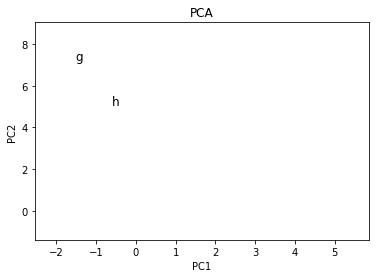

In [8]:
for translator in translators:

    # Load and process the data
    translator_df = pd.read_csv(f"{export_dir}/{translator}.csv")
    translator_df.set_index('level_0', inplace=True)
    # age_groups = np.array(translator_df['group'].values)
    # translator_df.drop(['translator', 'group'], axis=1, inplace=True)
    
    # Calculate the cosine distance and generate the dendrogram
    translator_corpus = delta.Corpus(corpus=zip_corpus)
    distances = delta.functions.cosine_delta(translator_corpus)
    clustering = delta.Clustering(distances)
    # plt.figure(figsize=(10, 100))
    # delta.Dendrogram(clustering).show()

# Perform PCA
pca = PCA(n_components=2)
documents_proj = pca.fit_transform(zip_corpus)

c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

# Plot the PCA results
fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, translator in zip(c1, c2, translators):
    ax.text(p1, p2, translator[0], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2', title=f'PCA');

In [9]:
print(pca.components_.shape)
comps = pca.components_.transpose()
print(comps.shape)

(2, 12358)
(12358, 2)


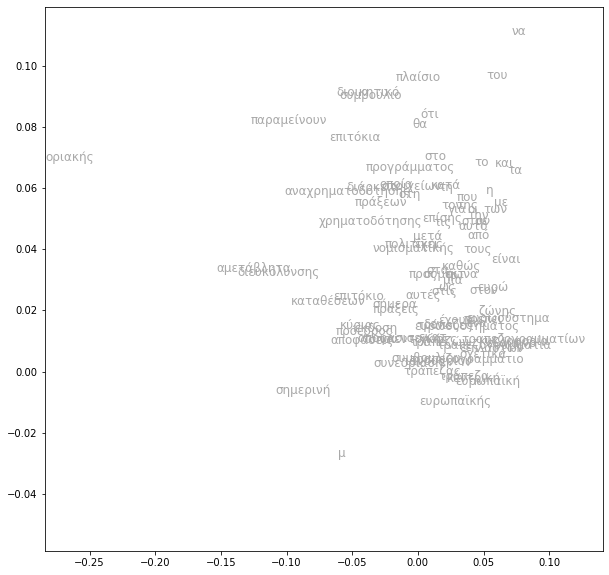

In [10]:
l1, l2 = comps[:, 0], comps[:, 1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(l1, l2, facecolors='none')

for x, y, l in zip(l1, l2, vocab[:100]):
    ax.text(x, y, l, ha='center', va='center', color='darkgrey', fontsize=12)

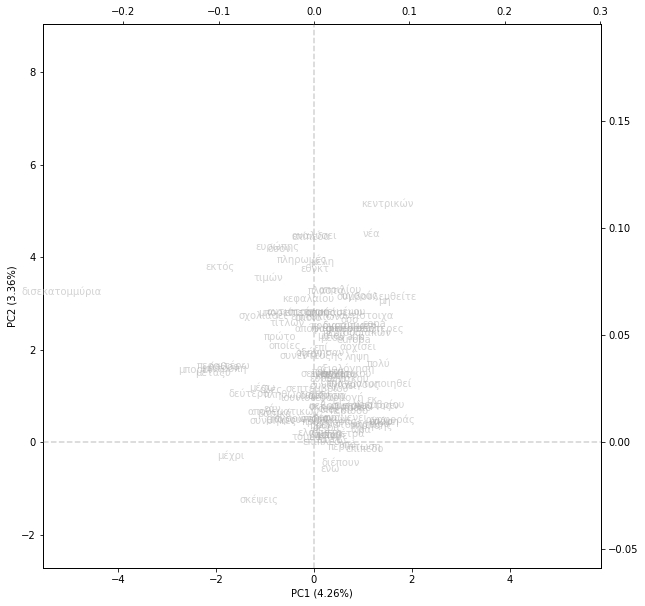

In [11]:
import mpl_axes_aligner.align

def plot_pca(document_proj, loadings, var_exp, labels):
    # first the texts:
    fig, text_ax = plt.subplots(figsize=(10, 10))
    x1, x2 = documents_proj[:, 0], documents_proj[:, 1]
    text_ax.scatter(x1, x2, facecolors='none')
    for p1, p2, author in zip(x1[625:675], x2[625:675], labels[625:675]):
        color = 'red' if author == 'human' else 'green'
        text_ax.text(p1, p2, author, ha='center', color=color, va='center', fontsize=12)

    # add variance information to the axis labels:
    text_ax.set_xlabel(f'PC1 ({var_exp[0] * 100:.2f}%)')
    text_ax.set_ylabel(f'PC2 ({var_exp[1] * 100:.2f}%)')

    # now the loadings:
    loadings_ax = text_ax.twinx().twiny() # this is the cool bit!
    l1, l2 = loadings[:, 0], loadings[:, 1]
    loadings_ax.scatter(l1, l2, facecolors='none');
    for x, y, loading in zip(l1, l2, vocab[125:250]):
        loadings_ax.text(x, y, loading, ha='center', va='center', color='darkgrey', fontsize=10, alpha=.5)
    
    # then, align the original axis with its twin:
    mpl_axes_aligner.align.yaxes(text_ax, 0, loadings_ax, 0)
    mpl_axes_aligner.align.xaxes(text_ax, 0, loadings_ax, 0)
    # add lines through origins:
    plt.axvline(0, ls='dashed', c='lightgrey', zorder=0)
    plt.axhline(0, ls='dashed', c='lightgrey', zorder=0);

# fit the pca:
# pca = PCA(n_components=2)
# documents_proj = pca.fit_transform(v_documents)
loadings = pca.components_.transpose()
var_exp = pca.explained_variance_ratio_

plot_pca(documents_proj, loadings, var_exp, zip_corpus.index[:75].str.replace(r'_\d{3}', '', regex=True).values)

In [12]:
bigrams = delta.FeatureGenerator(ngrams=2)
trigrams = delta.FeatureGenerator(ngrams=3)

new_corpus = delta.Corpus('data/corpus', lower_case=True, frequencies=True, feature_generator=bigrams)
new_corpus

c:\github\nettt-2022\.venv\lib\site-packages\delta\corpus.py:252: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  df = pd.DataFrame.from_dict(data, orient='index', dtype=dtype)


,της ΕΚΤ,Διοικητικό Συμβούλιο,το Διοικητικό,του ευρώ,της διευκόλυνσης,για την,από την,με την,ΕΚΤ θα,Συμβούλιο της,...,ήταν ο,ο προτιμώμενος,προτιμώμενος στόχος,παραχαρακτών ίσως,ίσως επειδή,επειδή τα,μια δημοφιλής,δημοφιλής ονομαστική,παραχάραξη κερμάτων,τις μεσογειακές
g_001,8.0,13.0,6.0,0.0,2.0,2.0,4.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_002,8.0,15.0,7.0,5.0,2.0,5.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_003,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_004,10.0,3.0,1.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h_642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_643,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_644,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_645,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Sort index by document pair
bi_corpus = new_corpus.sort_index(
    key=lambda x: x.str.replace('(g|h)_', '', regex=True)
    .astype(int)
)
bi_corpus.iloc[:6, :10]

,της ΕΚΤ,Διοικητικό Συμβούλιο,το Διοικητικό,του ευρώ,της διευκόλυνσης,για την,από την,με την,ΕΚΤ θα,Συμβούλιο της
g_001,8.0,13.0,6.0,0.0,2.0,2.0,4.0,2.0,5.0,0.0
h_001,6.0,14.0,7.0,0.0,2.0,1.0,4.0,2.0,5.0,0.0
h_002,7.0,16.0,8.0,5.0,2.0,3.0,4.0,3.0,4.0,0.0
g_002,8.0,15.0,7.0,5.0,2.0,5.0,2.0,4.0,4.0,0.0
g_003,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
h_003,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0


In [14]:
from sklearn.preprocessing import MinMaxScaler

x = bi_corpus.values
scl = MinMaxScaler()
x_scaled = scl.fit_transform(x)
bi_corpus = pd.DataFrame(x_scaled,
                    columns=bi_corpus.columns,
                    index=bi_corpus.index
                )
bi_corpus.head(10)

,της ΕΚΤ,Διοικητικό Συμβούλιο,το Διοικητικό,του ευρώ,της διευκόλυνσης,για την,από την,με την,ΕΚΤ θα,Συμβούλιο της,...,ήταν ο,ο προτιμώμενος,προτιμώμενος στόχος,παραχαρακτών ίσως,ίσως επειδή,επειδή τα,μια δημοφιλής,δημοφιλής ονομαστική,παραχάραξη κερμάτων,τις μεσογειακές
g_001,0.533333,0.764706,0.545455,0.000000,0.4,0.086957,0.500,0.117647,0.416667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_001,0.400000,0.823529,0.636364,0.000000,0.4,0.043478,0.500,0.117647,0.416667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_002,0.466667,0.941176,0.727273,0.454545,0.4,0.130435,0.500,0.176471,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_002,0.533333,0.882353,0.636364,0.454545,0.4,0.217391,0.250,0.235294,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_003,0.066667,0.000000,0.000000,0.000000,0.0,0.086957,0.000,0.058824,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_003,0.066667,0.000000,0.000000,0.000000,0.0,0.130435,0.000,0.058824,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_004,0.666667,0.176471,0.090909,0.272727,0.0,0.043478,0.250,0.058824,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_004,0.866667,0.176471,0.090909,0.272727,0.0,0.043478,0.125,0.176471,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_005,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.058824,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_005,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
translators = ['human', 'google']

export_dir = 'data/grouped_bigrams'
if not os.path.exists(export_dir):
    os.mkdir(export_dir)

for translator in translators:
    filtered_df = bi_corpus.reset_index()
    filtered_df = filtered_df[filtered_df.iloc[:, 0].str.startswith(translator[0])]
    filtered_df.to_csv(os.path.join(export_dir, f"{translator}.csv"), index=False)

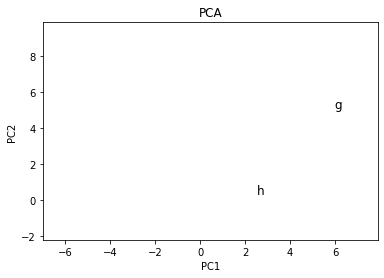

In [16]:
for translator in translators:

    # Load and process the data
    translator_df = pd.read_csv(f"{export_dir}/{translator}.csv")
    translator_df.set_index('index', inplace=True)
    # age_groups = np.array(translator_df['group'].values)
    # translator_df.drop(['translator', 'group'], axis=1, inplace=True)
    
    # Calculate the cosine distance and generate the dendrogram
    translator_corpus = delta.Corpus(corpus=bi_corpus)
    distances = delta.functions.cosine_delta(translator_corpus)
    clustering = delta.Clustering(distances)
    # plt.figure(figsize=(10, 100))
    # delta.Dendrogram(clustering).show()

# Perform PCA
pca = PCA(n_components=2)
documents_proj = pca.fit_transform(bi_corpus)

c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

# Plot the PCA results
fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, translator in zip(c1, c2, translators):
    ax.text(p1, p2, translator[0], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2', title=f'PCA');